In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
zeros = np.zeros((4,1))
zeros[3] = 1
zeros

array([[0.],
       [0.],
       [0.],
       [1.]])

In [83]:
def init_H0(N):
    return np.identity(N)-(1/N)*np.ones((N,N))

In [101]:
init_H0(4)

array([[ 0.75, -0.25, -0.25, -0.25],
       [-0.25,  0.75, -0.25, -0.25],
       [-0.25, -0.25,  0.75, -0.25],
       [-0.25, -0.25, -0.25,  0.75]])

In [102]:
def init_Hm(N,m):
#     vector_m = np.zeros((N,1))
    vector_m = np.identity(N)
    vector_m[m,m] = 0
    return vector_m
#     return np.kron(vector_m, vector_m.T)

In [104]:
init_Hm(4,1)

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [278]:
T = 30
N = 4
m = 1

H0 = init_H0(N)
Hm = init_Hm(N,m)

eigenvalues = []
for t in range(0, T+1):
    s = t/T
    H_tilde = (1-s)*H0 + s*Hm
#     eigenvalues.append(np.linalg.eigvals(H_tilde.astype(np.complex128)))
    eigenvalues.append(np.linalg.eigvals(H_tilde.astype(np.float32)))
    
eigenvalues = np.array(eigenvalues)
np.set_printoptions(precision=2, suppress=True)
print(eigenvalues)

[[ 1.   -0.    1.    1.  ]
 [ 0.02  1.    0.98  1.  ]
 [ 0.05  1.    0.95  1.  ]
 [ 0.07  1.    0.93  1.  ]
 [ 0.1   1.    0.9   1.  ]
 [ 0.12  1.    0.88  1.  ]
 [ 0.14  1.    0.86  1.  ]
 [ 0.16  1.    0.84  1.  ]
 [ 0.18  1.    0.82  1.  ]
 [ 0.2   1.    0.8   1.  ]
 [ 0.21  1.    0.79  1.  ]
 [ 0.22  1.    0.78  1.  ]
 [ 0.24  1.    0.76  1.  ]
 [ 0.24  1.    0.76  1.  ]
 [ 0.25  1.    0.75  1.  ]
 [ 0.25  1.    0.75  1.  ]
 [ 0.25  1.    0.75  1.  ]
 [ 0.24  1.    0.76  1.  ]
 [ 0.24  1.    0.76  1.  ]
 [ 0.22  1.    0.78  1.  ]
 [ 0.21  1.    0.79  1.  ]
 [ 1.    0.8   0.2   1.  ]
 [ 1.    0.82  0.18  1.  ]
 [ 1.    0.84  0.16  1.  ]
 [ 1.    0.86  0.14  1.  ]
 [ 1.    0.88  0.12  1.  ]
 [ 1.    0.9   0.1   1.  ]
 [ 1.    0.93  0.07  1.  ]
 [ 1.    0.95  0.05  1.  ]
 [ 1.    0.98  0.02  1.  ]
 [ 1.    0.    1.    1.  ]]


In [245]:
min_indices = np.argpartition(eigenvalues, kth=(1, 2), axis=1)[:, :2]

# Use the indices to extract the corresponding eigenvalues
min_eigenvalues = np.take_along_axis(eigenvalues, min_indices, axis=1)

# Print the results
print("First and second minimum eigenvalues for every row:")
print(min_eigenvalues[0,1])

AttributeError: 'list' object has no attribute 'ndim'

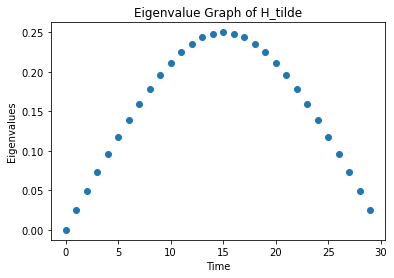

In [280]:

# for i in range(N):
#     plt.plot(eigenvalues[:,i])
    

x1_points = []
y1_points = []
for t in range(0, (int)(T)):
    if t < 30:
        x1_points.append(t)
        y1_points.append(min(eigenvalues[t,:]))
#         y1_points.append(min_eigenvalues[t,:])
# plt.plot(x1_points, y1_points)

plt.scatter(x1_points, y1_points)

# x1_points = []
# y1_points = []
# for t in range(1, T-1):
#     x1_points.append(t)
#     y1_points.append(min(eigenvalues[t,:]))
# plt.plot(x1_points, y1_points)

# x2_points = []
# y2_points = []
# for t in range(1, T-1):
#     x2_points.append(t)
#     y2_points.append(max(eigenvalues[t,:]))
# plt.plot(x2_points, y2_points)

plt.title("Eigenvalue Graph of H_tilde")
plt.xlabel("Time")
plt.ylabel("Eigenvalues")
plt.show()

In [290]:
from scipy.integrate import quad
from numpy import sqrt

def integrand(f, a):
    return 1 / (1 - 4 * f * (1 - f) * (1 - a**2))**(3/4)

N = 64
a = 1 / sqrt(N)

alpha, error = quad(integrand, 0, 1, args=(a,))
print("The result is:", alpha)


The result is: 5.455945569464067


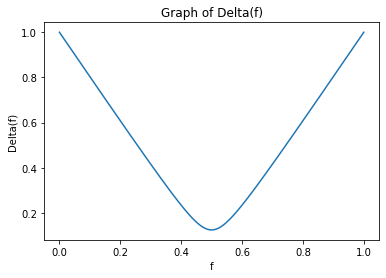

In [154]:
import numpy as np
import matplotlib.pyplot as plt

N = 64  # set the value of N
a = 1 / np.sqrt(N)  # calculate a

# define the function Delta(f)
def Delta(s,a):
#     return np.sqrt(1 - 4*f*(1-f)*(1-a**2))
    return np.sqrt(-4*a**2*s**2+4*a**2*s+4*s**2-4*s+1)

# create an array of values for f
f_vals = np.linspace(0, 1, 1000)

# evaluate Delta(f) for each value of f
Delta_vals = Delta(f_vals,a)

# plot Delta(f)
plt.plot(f_vals, Delta_vals)
plt.xlabel('f')
plt.ylabel('Delta(f)')
plt.title('Graph of Delta(f)')
plt.show()

In [87]:
# import numpy as np
# import matplotlib.pyplot as plt

# # define the derivative of g
# def df(s):
#     return 2*s

# # create an array of values for s
# s_vals = np.linspace(0, 50, 100)

# # calculate the values of the derivative dg
# df_vals = df(s_vals)

# # find the antiderivative of dg using numerical integration
# f_vals = np.cumsum(df_vals) * (s_vals[1] - s_vals[0])

# # plot the graph of g
# plt.plot(s_vals, f_vals)
# plt.xlabel('s')
# plt.ylabel('f(s)')
# plt.title('Graph of the Original Function f')
# plt.show()


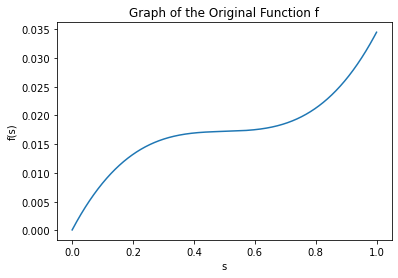

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

p = 2
N = 64
a = 1 / np.sqrt(N)

def Delta(s,a):
    return np.sqrt(-4*a**2*s**2+4*a**2*s+4*s**2-4*s+1)

def integrand(f, a):
    return 1 / (1 - 4 * f * (1 - f) * (1 - a**2))**(p/2)

alpha, error = quad(integrand, 0, 1, args=(a,))

alpha = 0.1

# define the derivative of g
def df(s, a, alpha):
    delta = Delta(s,a)
    return alpha * delta**(p)

# create an array of values for s
s_vals = np.linspace(0, 1, 1000)

# calculate the values of the derivative df
df_vals = df(s_vals, a, alpha)

# find the antiderivative of dg using numerical integration
f_vals = np.cumsum(df_vals) * (s_vals[1] - s_vals[0])

# plot the graph of g
plt.plot(s_vals, f_vals)
plt.xlabel('s')
plt.ylabel('f(s)')
plt.title('Graph of the Original Function f')
plt.show()


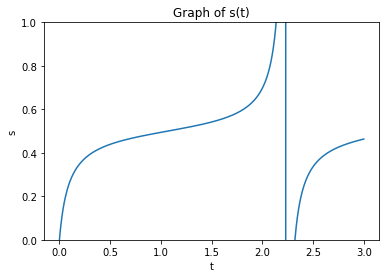

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 64
epsilon = alpha

# Define the function
def s(t):
    arg = (2*epsilon*np.sqrt(N-1)*t - N*np.arctan(np.sqrt(N-1))) / N
    num = np.sqrt(N-1) * np.tan(arg)
    den = 1 - N
    return 0.5 * (1 - num / den)

# Define the range of t values to plot
t_vals = np.linspace(0, 3, 1000)

# Generate the plot
plt.plot(t_vals, s(t_vals))
plt.xlabel('t')
plt.ylabel('s')
plt.ylim([0, 1])
plt.title('Graph of s(t)')
plt.show()


In [16]:
from scipy.integrate import quad
from numpy import sqrt

def integrand(f, a):
    return 1 / (1 - 4 * f * (1 - f) * (1 - a**2))

N = 64
a = 1 / sqrt(N)

alpha, error = quad(integrand, 0, 1, args=(a,))
print("The result is:", alpha)


The result is: 11.655162414955427


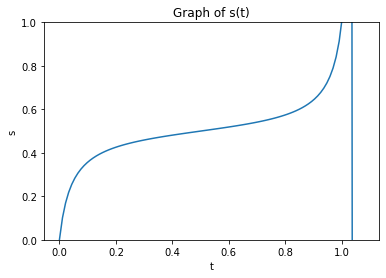

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 64
epsilon = alpha
# epsilon = 0.1

# Define the function
def s(t):
    arg = ((2*epsilon*np.sqrt(N-1)*t)/N - np.arctan(np.sqrt(N-1)))
    num = np.tan(arg) / np.sqrt(N-1)
    den = 1 + num
    return 0.5 * den


T=(np.pi/(2*epsilon))*np.sqrt(N)
# Define the range of t values to plot
t_vals = np.linspace(0, T, 100)

# Generate the plot
plt.plot(t_vals, s(t_vals))
plt.xlabel('t')
plt.ylabel('s')
plt.ylim([0, 1])
plt.title('Graph of s(t)')
plt.show()


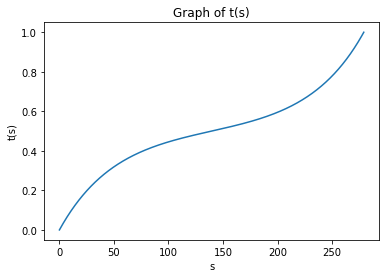

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def t(s, N, p, epsilon):
    return 1/epsilon * np.trapz(1/(1-4*(N-1)*s*(1-s)/N)**(p/2), s)

# Generate a set of s values
s_values = np.linspace(0, 1, 1000)

# Set the values of N, p, and epsilon
N = 64
p = 1
epsilon = 0.01

# Calculate the corresponding values of t(s)
t_values = np.array([t(s_values[:i], N, p, epsilon) for i in range(1, len(s_values)+1)])

# Plot the graph of t(s)
# plt.plot(s_values, t_values)
plt.plot(t_values, s_values)
plt.xlabel('s')
plt.ylabel('t(s)')
plt.title('Graph of t(s)')
plt.show()


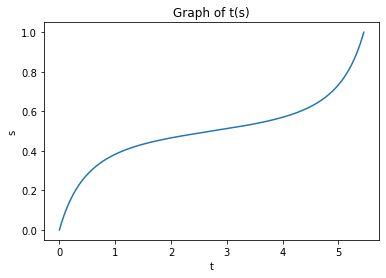

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

N = 64
p = 3/2
epsilon = 1
a = 1 / np.sqrt(N)

def Delta(s,a):
    return np.sqrt(-4*a**2*s**2+4*a**2*s+4*s**2-4*s+1)

def alpha_integrand(f, a):
    return 1 / (1 - 4 * f * (1 - f) * (1 - a**2))**(p/2)

alpha, error = quad(alpha_integrand, 0, 1, args=(a,))

# Define the integrand function
def t_integrand(s, N, p):
    return 1 / (1 - (4 * (N - 1) * s * (1 - s)) / N)**(p / 2)

# Define the function t(s) with numerical integration
def t(s, N, p, epsilon):
    integral, _ = quad(t_integrand, 0, s, args=(N, p))
    return integral / epsilon


# Create an array of s values between 0 and 1
s_values = np.linspace(0, 1, 1000)

alpha = epsilon
# Calculate the corresponding t(s) values
t_values = np.array([t(s, N, p, alpha) for s in s_values])

# Create a plot
plt.plot(t_values, s_values)
plt.xlabel('t')
plt.ylabel('s')
plt.title('Graph of t(s)')

# Show the plot
plt.show()


In [18]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the Hamiltonian matrix H(t) and the constant a
# N = 64
# a = 1 / sqrt(N)

# def H(s):
#     return np.array([[s, (s-1)*a],
#                      [-s*a, 1-s]])

# # Calculate the eigenvectors and eigenvalues of H(t)
# eigvals, eigvecs = np.linalg.eig(H(0))
# E0 = eigvecs[:, np.argmin(eigvals)]
# eigvals, eigvecs = np.linalg.eig(H(1))
# E1 = eigvecs[:, np.argmin(eigvals)]

# # Define a function to calculate the derivative of H(t)
# def dHdt(t):
#     return np.array([[1, a],
#                      [-a, -1]])

# # Define a function to calculate the desired inner product
# def inner_prod(s):
#     dH = dHdt(s)  
    
#     eigvals, eigvecs = np.linalg.eig(H(s))

#     # Find the index of the second minimum eigenvalue
#     idx0 = np.argsort(eigvals)[0]
#     idx1 = np.argsort(eigvals)[1]

#     # Extract the eigenvector corresponding to the second minimum eigenvalue
#     E0 = eigvecs[:, idx0]
# #     E1 = eigvecs[:, idx1]

#     return np.dot(np.conj(E1), np.dot(dH, E0))

# # Generate an array of values for t
# s_vals = np.linspace(0, 1, 100)

# # Calculate the inner product for each value of t
# inner_vals = np.array([inner_prod(s) for s in s_vals])

# # Plot the inner product as a function of t
# plt.plot(s_vals, inner_vals)
# plt.xlabel('s')
# plt.ylabel(r'$\langle E_1 | \frac{dH}{dt} | E_0 \rangle$')
# plt.show()



In [19]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the Hamiltonian matrix H(t) and the constant a
# N = 4
# a = 1 / sqrt(N)
# def H(t):
#     return np.array([[t, (t-1)*a],
#                      [-t*a, 1-t]])

# # Calculate the eigenvalues of H(t)
# eigvals = np.array([sorted(np.linalg.eigvals(H(t)))[0:2] for t in np.linspace(0, 1, 100)])

# # Plot the eigenvalues as a function of t
# plt.plot(np.linspace(0, 1, 100), eigvals[:, 0], label='First minimum eigenvalue')
# plt.plot(np.linspace(0, 1, 100), eigvals[:, 1], label='Second minimum eigenvalue')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('Eigenvalues')
# plt.show()


In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# N = 4
# a = 1 / sqrt(N)

# # Define the function f(s)
# def f(s, a):
#     X = (-1 + 2*s - np.sqrt(1 - 4*s + 4*a**2*s + 4*s**2 - 4*a**2*s**2)) / (2*a*s)
#     return X**2 + 2*a*X - 1

# # Generate an array of values for s
# s_vals = np.linspace(0.1, 1, 100)

# # Calculate the function values for each value of s
# f_vals = np.array([f(s, a) for s in s_vals])

# # Plot the function as a function of s
# plt.plot(s_vals, f_vals)
# plt.xlabel('s')
# plt.ylabel('f(s)')
# plt.show()
